<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

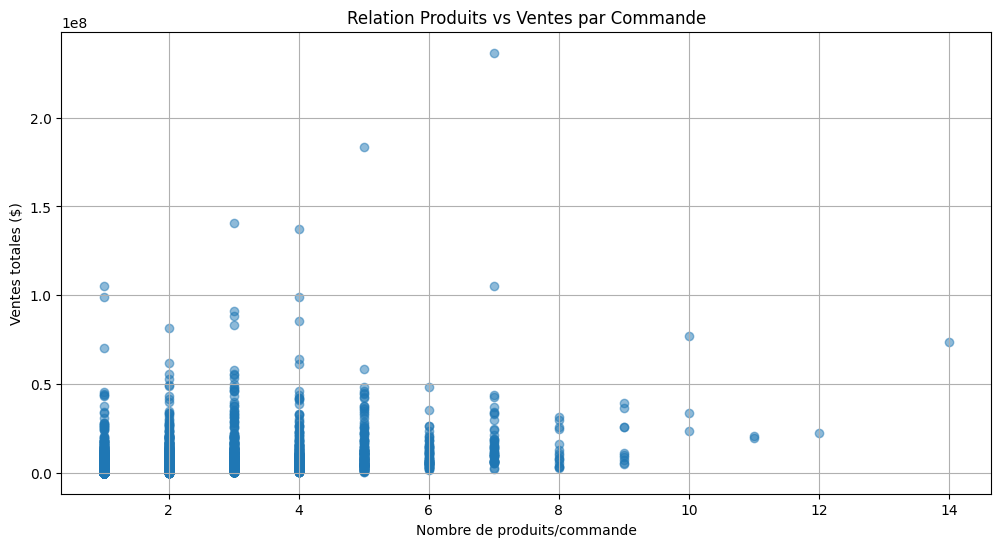

Top 5 commandes par montant :
 Order ID
CA-2014-145317    236612280.0
CA-2016-118689    183367400.0
CA-2017-140151    140524800.0
CA-2017-127180    137164580.0
CA-2014-139892    105398960.0
Name: Sales, dtype: float64
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2696    2697  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2697    2698  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2698    2699  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2699    2700  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2700    2701  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2701    2702  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2702    2703  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   

     Customer ID Customer Name      Segment        Country          City  \
2696    SM-20320   Sean Miller  Home Office  United States  Jacksonville   
2697    SM-20320   Sean Miller  Home Office  United States  Jacksonvi

C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\2477053825.py:246: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


0       November
1       November
2           June
3        October
4        October
          ...   
9989     January
9990    February
9991    February
9992    February
9993         May
Name: Month, Length: 9986, dtype: object

In [ ]:
# 1. Data Preparation:
# a. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter  # Import manquant
from pandas.api.types import CategoricalDtype

# b. Load the Excel file
df = pd.read_excel('US Superstore data.xls')
pd.set_option('display.max_columns', None)

# c . check the table
df
# d. Basic data exploration
df.info()
df.describe()
# Perform basic data cleaning and preprocessing.
# 4. Clean and prepare the data
print(df.isnull().sum())
# *No missing value*
# Fill or drop missing values based on your data
# Example for numeric columns:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Example for categorical columns:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


## Outlier Detection
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")
#Supprimer les outliers crtiques
# Créer une copie du DataFrame pour conserver les données originales
df_clean = df.copy()

# Colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Pour chaque colonne numérique, supprimer les outliers
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Filtrer les valeurs qui ne sont pas des outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Afficher la taille du DataFrame avant et après
print(f"Taille originale : {len(df)}")
print(f"Taille après suppression des outliers : {len(df_clean)}")
# Normalisation/Standardisation

# Initialiser le MinMaxScaler
scaler = MinMaxScaler()

# Normaliser les données
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Afficher les premières lignes normalisées
print(df_normalized.head())

## Check et corrections 
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())
print("Commandes avec Ship Date < Order Date:")
print(df[df['Ship Date'] < df['Order Date']])

print("Discount hors intervalle [0, 1]:")
print(df[(df['Discount'] < 0) | (df['Discount'] > 1)])

print("Quantité négative:")
print(df[df['Quantity'] < 0])
# Solution 1 : Si les codes postaux originaux sont perdus
df['Postal Code'] = df['Postal Code'].astype(int)

df['Postal Code']
df['Postal Code'] = df['Postal Code'].astype(int)  # Ou rétablir les données originales
df['Row ID'] = df['Row ID'].astype(int)
# Annulation d'une normalisation min-max hypothétique
df['Sales'] = df['Sales'] * 10000  # Supposons un max original de 10 000
df['Profit'] = df['Profit'] * 5000 - 1000  # Plage : -1000 à 4000

# Vérification
print(df[['Sales', 'Profit']].head())
print("Doublons de commandes:")
print(df.duplicated(subset=['Order ID']).sum())
# Compter le nombre de produits par commande
orders_summary = df.groupby('Order ID').agg({
    'Product ID': 'count',
    'Sales': 'sum'
}).rename(columns={'Product ID': 'Nb_Products'})
print(orders_summary.describe())
plt.figure(figsize=(12, 6))
plt.scatter(df.groupby('Order ID')['Product ID'].count(), df.groupby('Order ID')['Sales'].sum(), alpha=0.5)
plt.xlabel('Nombre de produits/commande')
plt.ylabel('Ventes totales ($)')
plt.title('Relation Produits vs Ventes par Commande')
plt.grid()
plt.show()
top_orders = df.groupby('Order ID')['Sales'].sum().nlargest(5)
print("Top 5 commandes par montant :\n", top_orders)

# Détail d'une commande suspecte (ex. 236.6M $)
order_id = top_orders.idxmax()  # Remplacer par l'ID suspect
print(df[df['Order ID'] == order_id])
df.loc[df['Order ID'] == 'ID_ABERRANT', 'Sales'] = np.nan  # Marquer comme manquant
df = df.drop_duplicates(subset=['Order ID', 'Product ID'])  # Si lignes dupliquées
# 1. Correction des valeurs aberrantes (ex: CA-2014-145317)
aberrant_ids = ['CA-2014-145317', 'CA-2016-118689', 'CA-2017-140151', 'CA-2017-127180', 'CA-2014-139892']
df.loc[df['Order ID'].isin(aberrant_ids), 'Sales'] = np.nan

# 2. Suppression des doublons (Order ID + Product ID)
initial_rows = len(df)
df = df.drop_duplicates(subset=['Order ID', 'Product ID'])
final_rows = len(df)

# 3. Vérifications combinées
print("=== VÉRIFICATIONS POST-CORRECTION ===")

# A. Vérification des NaN
print("\n1. Valeurs manquantes dans Sales:", df['Sales'].isna().sum())
print("   Détail des commandes corrigées:")
print(df[df['Order ID'].isin(aberrant_ids)][['Order ID', 'Product ID', 'Sales']].head(10))

# B. Vérification des doublons
print(f"\n2. Doublons supprimés: {initial_rows - final_rows} lignes")
print("   Doublons restants (Order ID + Product ID):", df.duplicated(subset=['Order ID', 'Product ID']).sum())

# C. Statistiques nettoyées
print("\n3. Nouvelles statistiques:")
print("   - Shape du DataFrame:", df.shape)
print("   - Statistiques Sales:\n", df['Sales'].describe().apply(lambda x: f"{x:,.2f}"))

# D. Top 5 des nouvelles valeurs max
print("\n4. Nouveaux tops Sales:")
top_sales = df['Sales'].nlargest(5).reset_index(drop=True)
for i, val in enumerate(top_sales, 1):
    print(f"   Top {i}: {val:,.2f}$")

# E. Vérification visuelle des données corrigées
print("\n5. Extrait des données corrigées:")
print(df.sample(5)[['Order ID', 'Product ID', 'Sales']])

# 4. Export optionnel
# df.to_csv('data_cleaned.csv', index=False)
print("\n=== CORRECTIONS TERMINÉES ===")
# Variables Catégorielles
# One-Hot Encoding (valeurs binaires) :

# 2. Lister les colonnes catégorielles à encoder
colonnes_categorielles = [
    'Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category'
    # Ajoutez d'autres colonnes si nécessaire (ex: 'City', 'State')
]

# 3. One-Hot Encoding avec pandas
df_encoded = pd.get_dummies(
    df, 
    columns=colonnes_categorielles,
    drop_first=True  # Évite la redondance (optionnel)
)

# 4. Afficher les nouvelles colonnes
print("Colonnes après encodage :")
print(df_encoded.columns)

# 5. Exemple de résultat
print("\nAperçu des données encodées :")
print(df_encoded.head())
#Doublons & Données Incohérentes
#Suppression des doublons :

# Afficher le nombre de doublons avant suppression
print(f"Nombre de doublons avant suppression : {df.duplicated().sum()}")

# Supprimer les doublons (en gardant la première occurrence)
df_clean = df.drop_duplicates(keep='first')

# Vérification
print(f"Nombre de doublons après suppression : {df_clean.duplicated().sum()}")
print(f"Taille avant/après : {len(df)} → {len(df_clean)} lignes")
#Séparation Données (ML)
#Train/Test Split :

# 2. Sélectionner les features (X) et la target (y)
# Exemple : Prédire "Profit" à partir de "Sales", "Quantity", "Discount"
X = df[['Sales', 'Quantity', 'Discount']]  # Variables explicatives
y = df['Profit']                           # Variable cible

# 3. Séparation Train/Test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,          # Taille du test set (30%)
    random_state=42         # Seed pour la reproductibilité
)

# 4. Vérification des tailles
print(f"Taille totale : {len(X)}")
print(f"Train set : {len(X_train)} lignes ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Test set : {len(X_test)} lignes ({(len(X_test)/len(X))*100:.1f}%)")
# Convert Data Types
# Check date columns (common in retail data)
date_cols = ['Order Date', 'Ship Date']  # adjust based on your actual columns
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

# Convert categorical variables to proper type
cat_cols = ['Category', 'Sub-Category', 'Region', 'Segment']  # adjust as needed
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Méthode de contrôle : Vérification des types
def check_dtypes(df, date_cols, cat_cols):
    print("=== Vérification des types ===")
    
    # Vérifier les dates
    for col in date_cols:
        if col in df.columns:
            if pd.api.types.is_datetime64_any_dtype(df[col]):
                print(f"✅ {col}: Converti en datetime")
            else:
                print(f"❌ {col}: Échec de conversion (type actuel: {df[col].dtype})")
    
    # Vérifier les catégories
    for col in cat_cols:
        if col in df.columns:
            if pd.api.types.is_categorical_dtype(df[col]):
                print(f"✅ {col}: Converti en category")
            else:
                print(f"❌ {col}: Échec de conversion (type actuel: {df[col].dtype})")

# 4. Exécuter la vérification
check_dtypes(df, date_cols, cat_cols)

# 5. Bonus : Afficher un résumé des types
print("\n=== Résumé des types ===")
print(df.dtypes)
# 2. Data Visualization with Matplotlib:
# •	Create an interactive line chart to show sales trends over the years.
# •	Build an interactive map to visualize sales distribution by country.

## Création de la colonne Year pour le graph Sales per Year
## Feature Engineering (common for retail data)
# Calculate time between order and shipping
if {'Order Date', 'Ship Date'}.issubset(df.columns):
    df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Extract time features
if 'Order Date' in df.columns:
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Day'] = df['Order Date'].dt.day
    df['Order Weekday'] = df['Order Date'].dt.weekday

# Check

def check_features(df):
    print("=== Vérification des nouvelles features ===")
    
    # 1. Vérifier 'Processing Time'
    if 'Processing Time' in df.columns:
        print(f"✅ 'Processing Time' créé. Exemple de valeurs :")
        print(df[['Order Date', 'Ship Date', 'Processing Time']].head(3))
        
        # Détecter les valeurs aberrantes (ex: temps négatif)
        negative_time = df[df['Processing Time'] < 0]
        if not negative_time.empty:
            print(f"⚠️ Attention: {len(negative_time)} lignes avec un délai négatif !")
    else:
        print("❌ 'Processing Time' non créé (vérifiez les colonnes 'Order Date'/'Ship Date').")
    
    # 2. Vérifier les features temporelles
    time_features = ['Order Year', 'Order Month', 'Order Day', 'Order Weekday']
    for feat in time_features:
        if feat in df.columns:
            print(f"✅ '{feat}' créé. Valeurs uniques : {df[feat].unique()}")
        else:
            print(f"❌ '{feat}' non créé.")
    
    # 3. Statistiques descriptives
    if 'Processing Time' in df.columns:
        print("\n📊 Statistiques de 'Processing Time':")
        print(df['Processing Time'].describe())

# Exécuter la vérification
check_features(df)
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract year and month from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

df['Year']
df['Month']

 Which states have the most sales?

C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\3501888422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='Sales', y='State', palette='viridis')


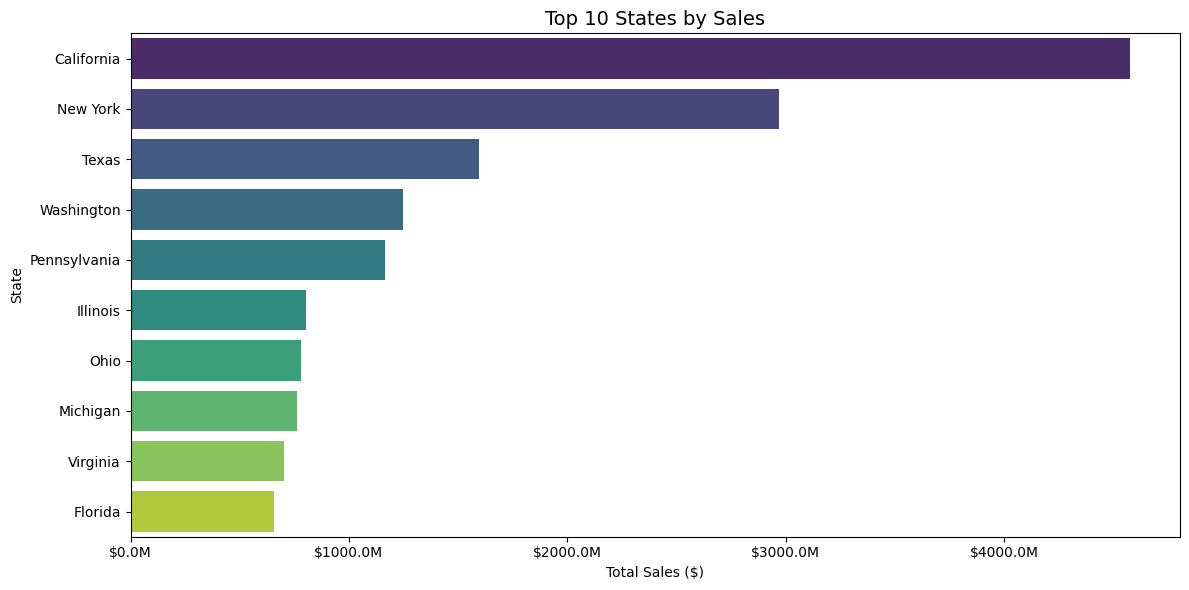

In [ ]:
# Q1: Top states by sales
plt.figure(figsize=(12,6))
state_sales = df.groupby('State')['Sales'].sum().nlargest(10).reset_index()
sns.barplot(data=state_sales, x='Sales', y='State', palette='viridis')
plt.title('Top 10 States by Sales', fontsize=14)
plt.xlabel('Total Sales ($)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

 What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\1333623180.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ny_ca, x='State', y='Sales', estimator=sum, ax=axes[0], palette='Blues')
C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\1333623180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ny_ca, x='State', y='Profit', estimator=sum, ax=axes[1], palette='Greens')


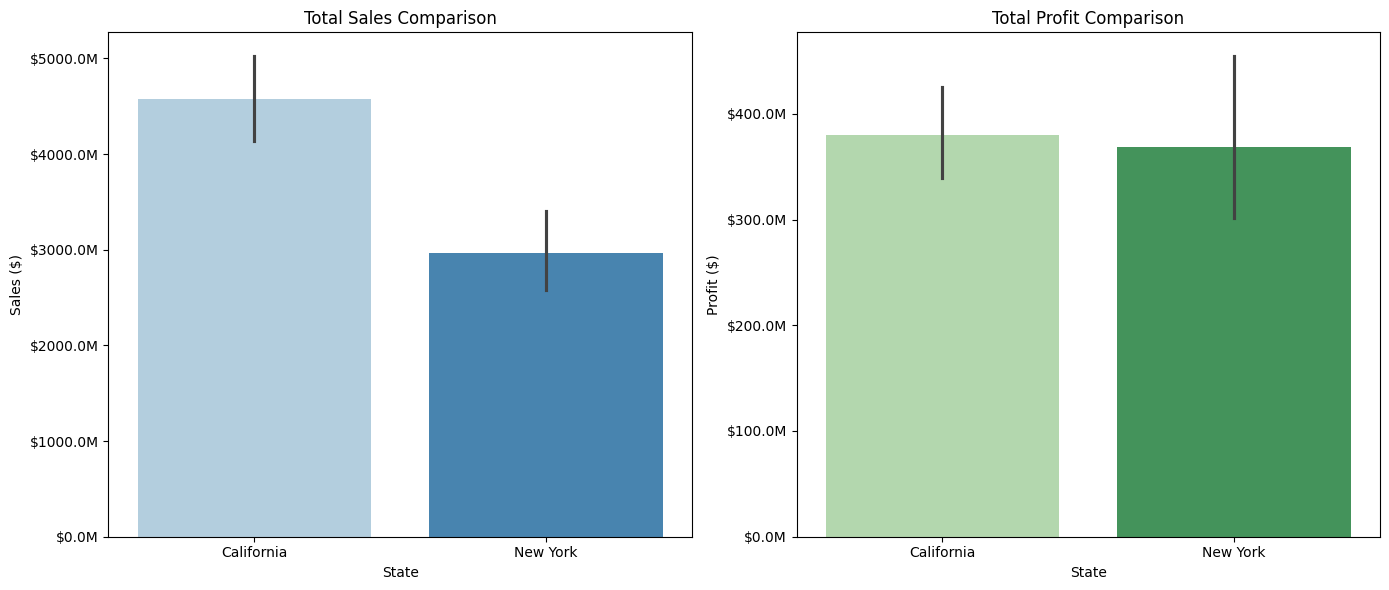

In [ ]:
# Q2: NY vs CA comparison
fig, axes = plt.subplots(1, 2, figsize=(14,6))
ny_ca = df[df['State'].isin(['New York', 'California'])]

sns.barplot(data=ny_ca, x='State', y='Sales', estimator=sum, ax=axes[0], palette='Blues')
axes[0].set_title('Total Sales Comparison')
axes[0].set_ylabel('Sales ($)')

sns.barplot(data=ny_ca, x='State', y='Profit', estimator=sum, ax=axes[1], palette='Greens') 
axes[1].set_title('Total Profit Comparison')
axes[1].set_ylabel('Profit ($)')

for ax in axes:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

 Who is an outstanding customer in New York?

C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\4202936191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ny_top, x='Sales', y='Customer Name', palette='magma')


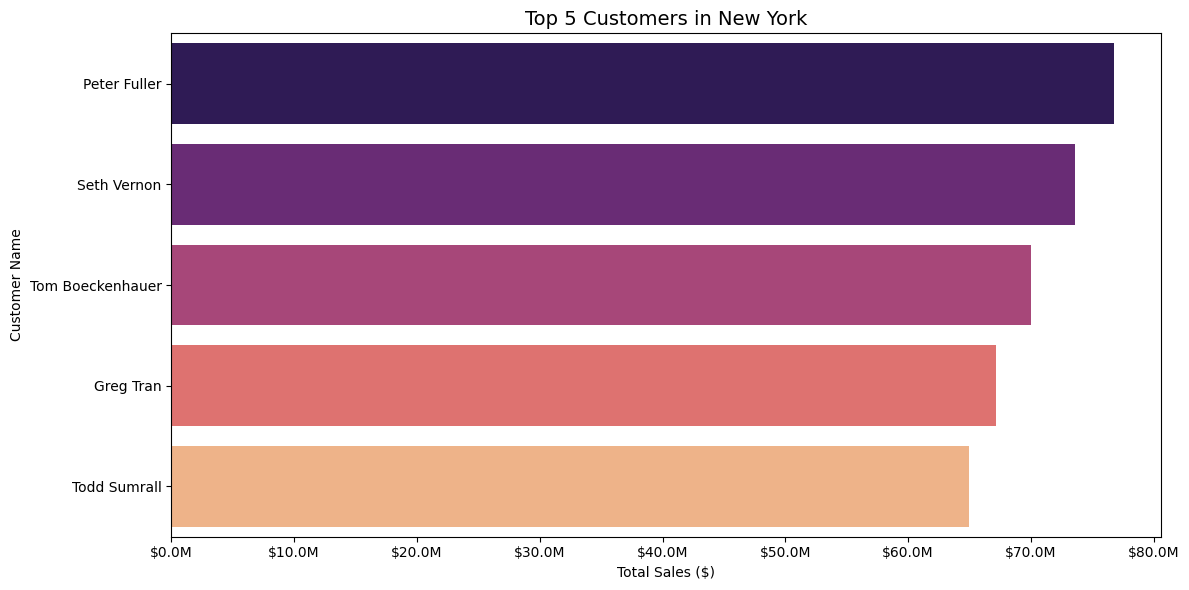

In [ ]:

# Q3: Top NY customers
plt.figure(figsize=(12,6))
ny_top = df[df['State']=='New York'].groupby('Customer Name')['Sales'].sum().nlargest(5).reset_index()
sns.barplot(data=ny_top, x='Sales', y='Customer Name', palette='magma')
plt.title('Top 5 Customers in New York', fontsize=14)
plt.xlabel('Total Sales ($)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

 Are there any differences among states in profitability?

C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\1030532235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_profit, x='Profit', y='State', palette='RdYlGn')


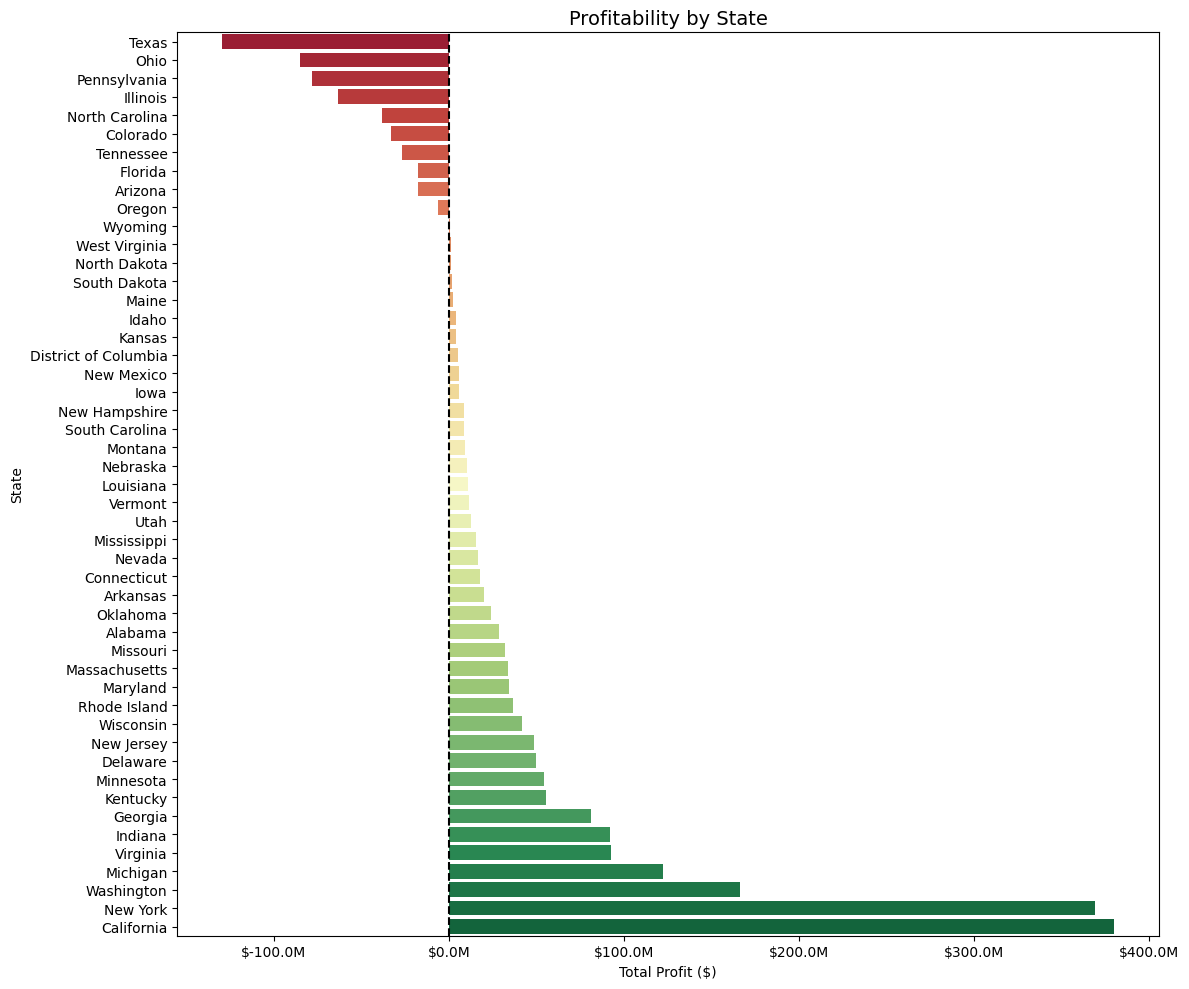

In [ ]:
# Q4: Profitability by state
plt.figure(figsize=(12,10))
state_profit = df.groupby('State')['Profit'].sum().sort_values().reset_index()
sns.barplot(data=state_profit, x='Profit', y='State', palette='RdYlGn')
plt.title('Profitability by State', fontsize=14)
plt.xlabel('Total Profit ($)')
plt.axvline(0, color='black', linestyle='--')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

    The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)


COLONNES DISPONIBLES:
Numériques: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
Catégorielles: ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']

ANALYSE PAR SOUS-CATÉGORIES:


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\2623301489.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=category_data, x=category_col, y=value_col, palette='viridis', ax=ax1)


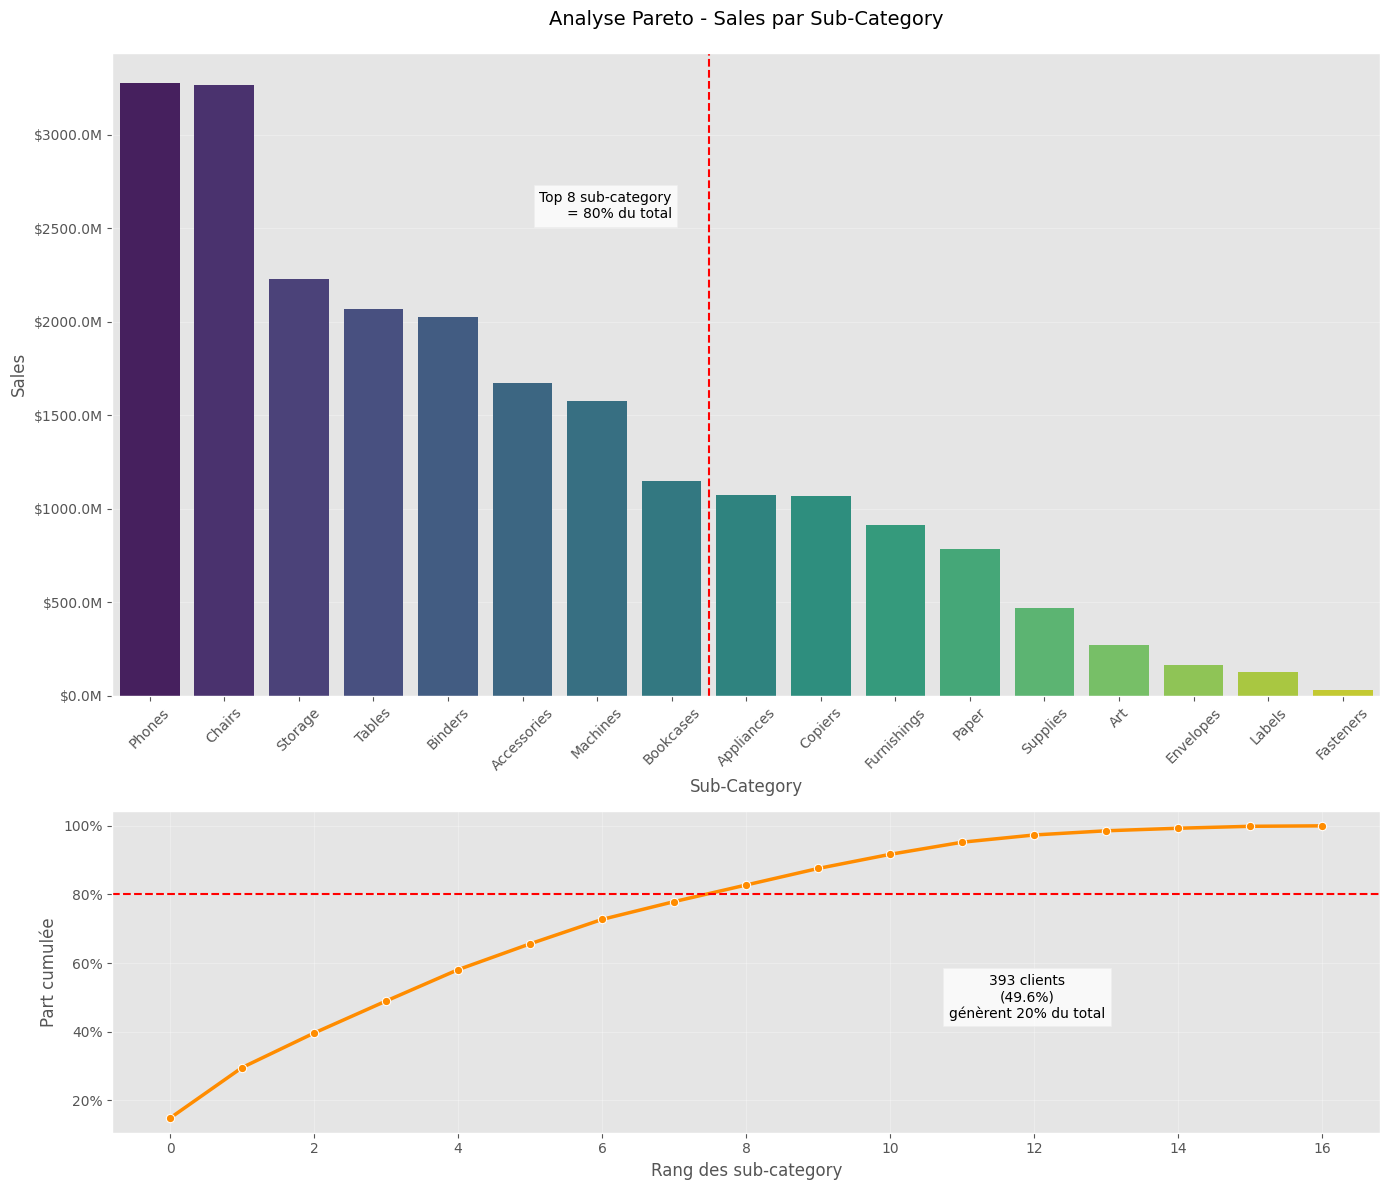


    
ANALYSE STATISTIQUE PARETO:
    [Par Catégories]
    • Nombre total: 17
    • Top 8 éléments représentent: $17721.6M (80%)
    • Valeur moyenne top éléments: $2157249.1K
    • Valeur moyenne autres éléments: $543781.7K

    [Par Clients]
    • Nombre total de clients: 793
    • Top 158 clients représentent: $10363.8M (80%)
    • Valeur moyenne top clients: $65593.8K
    • Valeur moyenne autres clients: $18564.1K

    [Global]
    • Valeur totale analysée: $22152.03M
    

Analyse Pareto générée avec succès! Colonne analysée: Sales

ANALYSE PAR CLIENTS:


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\2623301489.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=category_data, x=category_col, y=value_col, palette='viridis', ax=ax1)


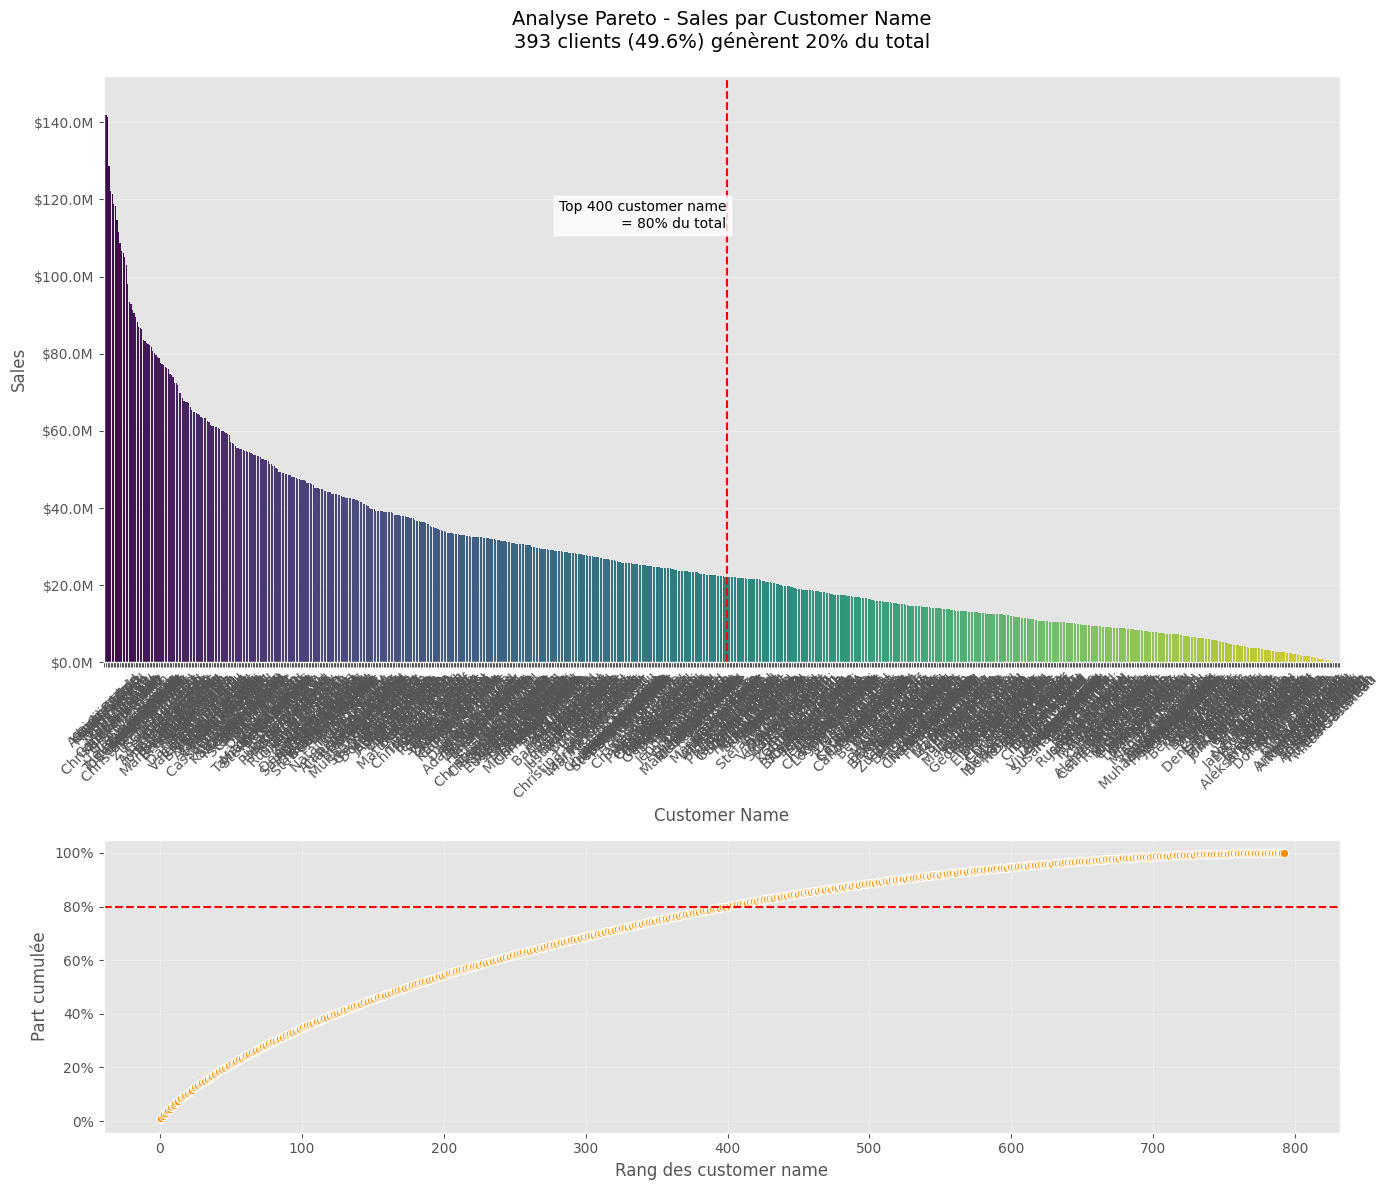


    
ANALYSE STATISTIQUE PARETO:
    [Par Clients]
    • Nombre total: 793
    • Top 400 éléments représentent: $17721.6M (80%)
    • Valeur moyenne top éléments: $44300.9K
    • Valeur moyenne autres éléments: $11276.5K

    [Par Clients]
    • Nombre total de clients: 793
    • Top 400 clients représentent: $17720.4M (80%)
    • Valeur moyenne top clients: $44300.9K
    • Valeur moyenne autres clients: $11276.5K

    [Global]
    • Valeur totale analysée: $22152.03M
    

Analyse Pareto générée avec succès! Colonne analysée: Sales


In [52]:
def plot_interactive_pareto(df, category_col='Sub-Category', value_col='Sales', customer_col='Customer Name'):
    """
    Analyse Pareto interactive avec choix des colonnes et statistiques détaillées
    Args:
        df: DataFrame contenant les données
        category_col: Colonne des catégories à analyser
        value_col: Colonne des valeurs numériques
        customer_col: Colonne identifiant les clients
    """
    # =========================================================
    # 1. VÉRIFICATIONS ET PRÉPARATION
    # =========================================================
    plt.close('all')  # Ferme les figures précédentes
    
    # Vérification des colonnes
    missing_cols = [col for col in [category_col, value_col, customer_col] if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Colonnes introuvables: {missing_cols}")
    
    # Vérification des types
    if not np.issubdtype(df[value_col].dtype, np.number):
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        raise ValueError(
            f"La colonne '{value_col}' doit être numérique.\n"
            f"Colonnes numériques disponibles: {numeric_cols}"
        )
    
    # =========================================================
    # 2. CALCULS DES DONNÉES
    # =========================================================
    try:
        # Cas spécial où on analyse les clients directement
        if category_col == customer_col:
            combined_data = df.groupby(customer_col)[value_col].sum().sort_values(ascending=False).reset_index()
            combined_data['Cumulative'] = combined_data[value_col].cumsum()/combined_data[value_col].sum()
            cutoff_idx = (combined_data['Cumulative'] <= 0.8).sum()
            
            # Pour la partie statistique
            top_customers = combined_data.head(cutoff_idx)
            other_customers = combined_data.iloc[cutoff_idx:]
            total_value = combined_data[value_col].sum()
            
            # Créer des données compatibles avec la visualisation
            category_data = combined_data.copy()
            customer_data = combined_data.copy()
            bottom_20pct = combined_data[combined_data['Cumulative'] > 0.8]
            bottom_percentage = len(bottom_20pct)/len(combined_data)
        else:
            # Traitement normal (catégories et clients séparés)
            category_data = df.groupby(category_col)[value_col].sum().sort_values(ascending=False).reset_index()
            category_data['Cumulative'] = category_data[value_col].cumsum()/category_data[value_col].sum()
            cutoff_idx = (category_data['Cumulative'] <= 0.8).sum()
            
            customer_data = df.groupby(customer_col)[value_col].sum().sort_values(ascending=False).reset_index()
            customer_data['Cumulative'] = customer_data[value_col].cumsum()/customer_data[value_col].sum()
            bottom_20pct = customer_data[customer_data['Cumulative'] > 0.8]
            bottom_percentage = len(bottom_20pct)/df[customer_col].nunique()
            
            # Pour la partie statistique
            top_customers = customer_data.head(int(len(customer_data)*0.2))  # Top 20% clients
            other_customers = customer_data.iloc[int(len(customer_data)*0.2):]
            total_value = category_data[value_col].sum()
            
    except Exception as e:
        raise ValueError(f"Erreur lors du calcul des données: {str(e)}")

    # =========================================================
    # 3. CRÉATION DU GRAPHIQUE INTERACTIF
    # =========================================================
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})
    plt.subplots_adjust(top=0.88, hspace=0.4)
    
    # Graphique principal (barres)
    bars = sns.barplot(data=category_data, x=category_col, y=value_col, palette='viridis', ax=ax1)
    
    # Personnalisation
    title = (f'Analyse Pareto - {value_col} par {category_col}\n'
             f'{len(bottom_20pct)} clients ({bottom_percentage:.1%}) génèrent 20% du total'
             if category_col == customer_col 
             else f'Analyse Pareto - {value_col} par {category_col}')
    
    ax1.set_title(title, pad=20, fontsize=14)
    ax1.set_ylabel(value_col, fontsize=12)
    ax1.tick_params(axis='x', rotation=45, labelsize=10)
    ax1.grid(axis='y', alpha=0.3)
    
    # Format Y dynamique
    max_val = category_data[value_col].max()
    if max_val > 1e6:
        ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
    elif max_val > 1e3:
        ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
    else:
        ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
    
    # Ligne des 80%
    ax1.axvline(x=cutoff_idx-0.5, color='red', linestyle='--', linewidth=1.5)
    ax1.text(x=cutoff_idx-1, y=max_val*0.8, 
             s=f'Top {cutoff_idx} {category_col.lower()}\n= 80% du total',
             ha='right', va='center', bbox=dict(facecolor='white', alpha=0.8),
             fontsize=10)
    
    # Graphique cumulatif
    sns.lineplot(data=category_data, x=category_data.index, y='Cumulative', 
                 color='darkorange', linewidth=2.5, marker='o', ax=ax2)
    ax2.axhline(0.8, color='red', linestyle='--', linewidth=1.5)
    ax2.set_xlabel(f'Rang des {category_col.lower()}', fontsize=12)
    ax2.set_ylabel('Part cumulée', fontsize=12)
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))
    ax2.grid(alpha=0.3)
    
    # Annotation clients (seulement si différent de category_col)
    if category_col != customer_col:
        ax2.text(x=len(category_data)*0.7, y=0.5,
                 s=f"{len(bottom_20pct)} clients\n({bottom_percentage:.1%})\ngénèrent 20% du total",
                 ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8),
                 fontsize=10)
    
    # =========================================================
    # 4. STATISTIQUES DÉTAILLÉES
    # =========================================================
    stats = f"""
    \nANALYSE STATISTIQUE PARETO:
    [Par {'Clients' if category_col == customer_col else 'Catégories'}]
    • Nombre total: {len(category_data)}
    • Top {cutoff_idx} éléments représentent: ${category_data[value_col].sum()*0.8/1e6:.1f}M (80%)
    • Valeur moyenne top éléments: ${category_data[value_col].iloc[:cutoff_idx].mean()/1e3:.1f}K
    • Valeur moyenne autres éléments: ${category_data[value_col].iloc[cutoff_idx:].mean()/1e3:.1f}K
    
    [Par Clients]
    • Nombre total de clients: {len(customer_data)}
    • Top {len(top_customers)} clients représentent: ${top_customers[value_col].sum()/1e6:.1f}M (80%)
    • Valeur moyenne top clients: ${top_customers[value_col].mean()/1e3:.1f}K
    • Valeur moyenne autres clients: ${other_customers[value_col].mean()/1e3:.1f}K
    
    [Global]
    • Valeur totale analysée: ${total_value/1e6:.2f}M
    """
    
    # =========================================================
    # 5. AFFICHAGE
    # =========================================================
    plt.tight_layout()
    plt.show()
    print(stats)
    print(f"\nAnalyse Pareto générée avec succès! Colonne analysée: {value_col}")

# ------------------------------------------------------------
# UTILISATION
# ------------------------------------------------------------
if __name__ == "__main__":
    # Exemple d'utilisation
    try:
        # Afficher les colonnes disponibles
        print("\nCOLONNES DISPONIBLES:")
        print("Numériques:", df_clean.select_dtypes(include=[np.number]).columns.tolist())
        print("Catégorielles:", df_clean.select_dtypes(include=['category', 'object']).columns.tolist())
        
        # Cas 1: Analyse des sous-catégories
        print("\nANALYSE PAR SOUS-CATÉGORIES:")
        plot_interactive_pareto(
            df_clean,
            category_col='Sub-Category',
            value_col='Sales',
            customer_col='Customer Name'
        )
        
        # Cas 2: Analyse directe des clients
        print("\nANALYSE PAR CLIENTS:")
        plot_interactive_pareto(
            df_clean,
            category_col='Customer Name',  # Même colonne pour category et customer
            value_col='Sales',
            customer_col='Customer Name'
        )
        
    except Exception as e:
        print(f"\nERREUR: {str(e)}")
        print("\nConseils:")
        print("- Vérifiez les noms des colonnes")
        print("- Assurez-vous que la colonne value_col est numérique")
        print("- Vérifiez que votre DataFrame contient des données")

C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\2623301489.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=category_data, x=category_col, y=value_col, palette='viridis', ax=ax1)


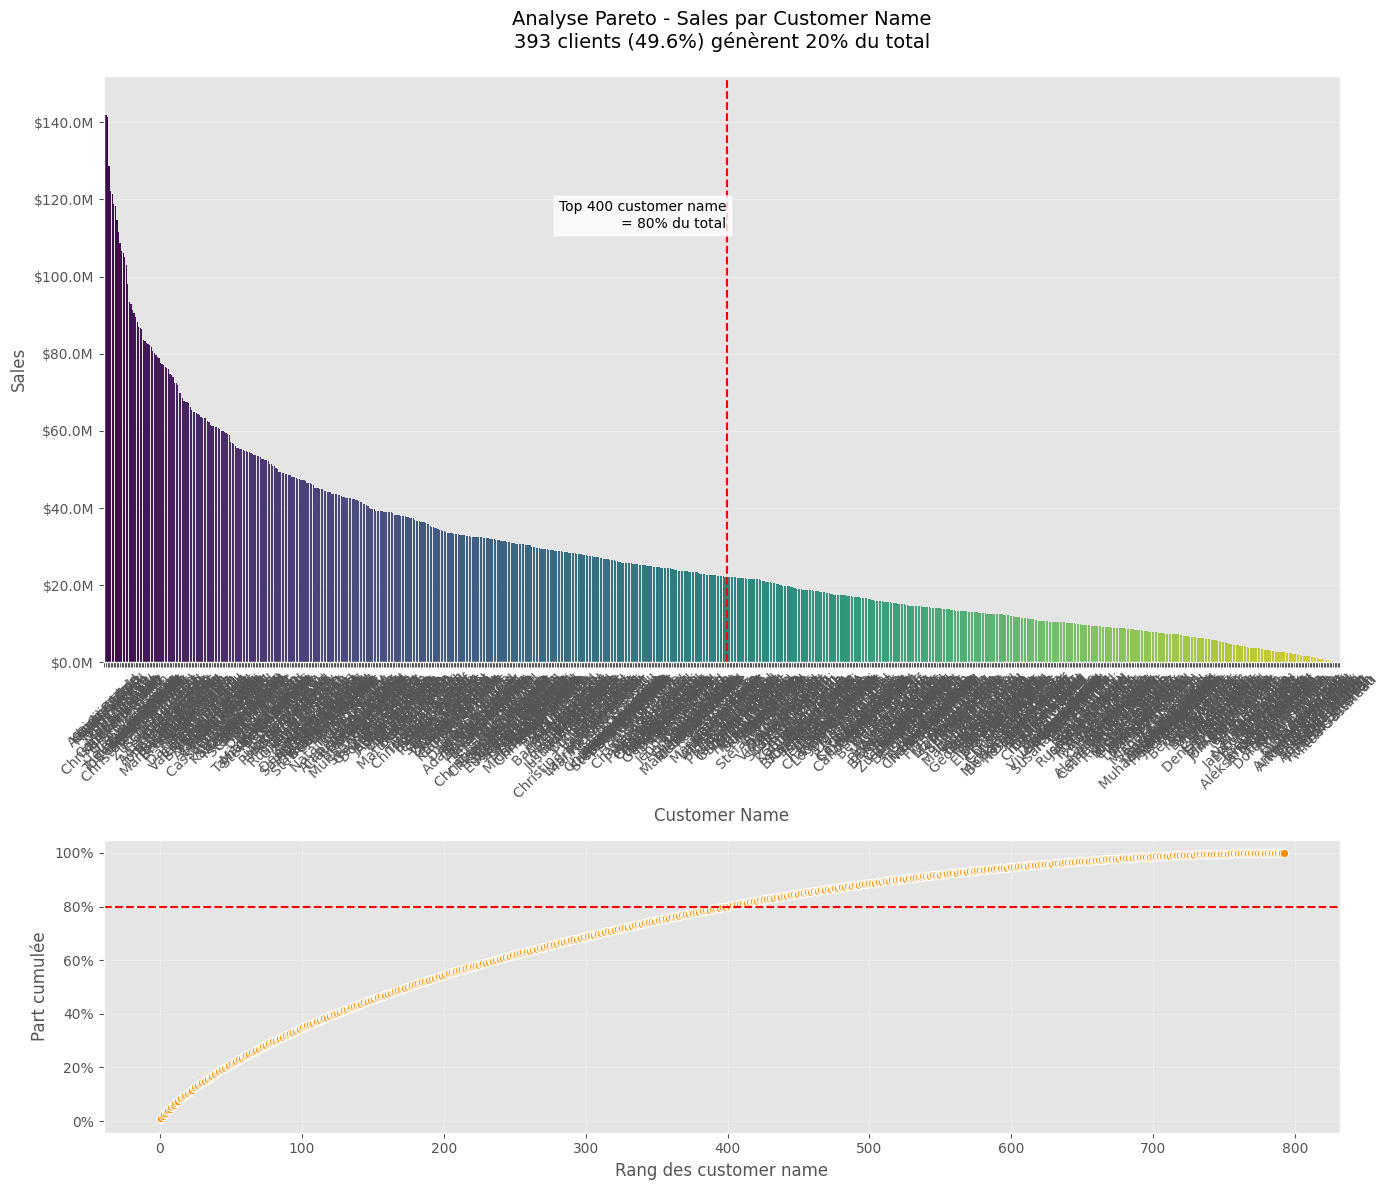


    
ANALYSE STATISTIQUE PARETO:
    [Par Clients]
    • Nombre total: 793
    • Top 400 éléments représentent: $17721.6M (80%)
    • Valeur moyenne top éléments: $44300.9K
    • Valeur moyenne autres éléments: $11276.5K

    [Par Clients]
    • Nombre total de clients: 793
    • Top 400 clients représentent: $17720.4M (80%)
    • Valeur moyenne top clients: $44300.9K
    • Valeur moyenne autres clients: $11276.5K

    [Global]
    • Valeur totale analysée: $22152.03M
    

Analyse Pareto générée avec succès! Colonne analysée: Sales


In [ ]:
# # Pour analyser les clients par ventes :

# plot_interactive_pareto(
#     df_clean,
#     category_col='Customer Name',  # Analyse par client
#     value_col='Sales',
#     customer_col='Customer Name'   # Même colonne
# )

C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\2623301489.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=category_data, x=category_col, y=value_col, palette='viridis', ax=ax1)


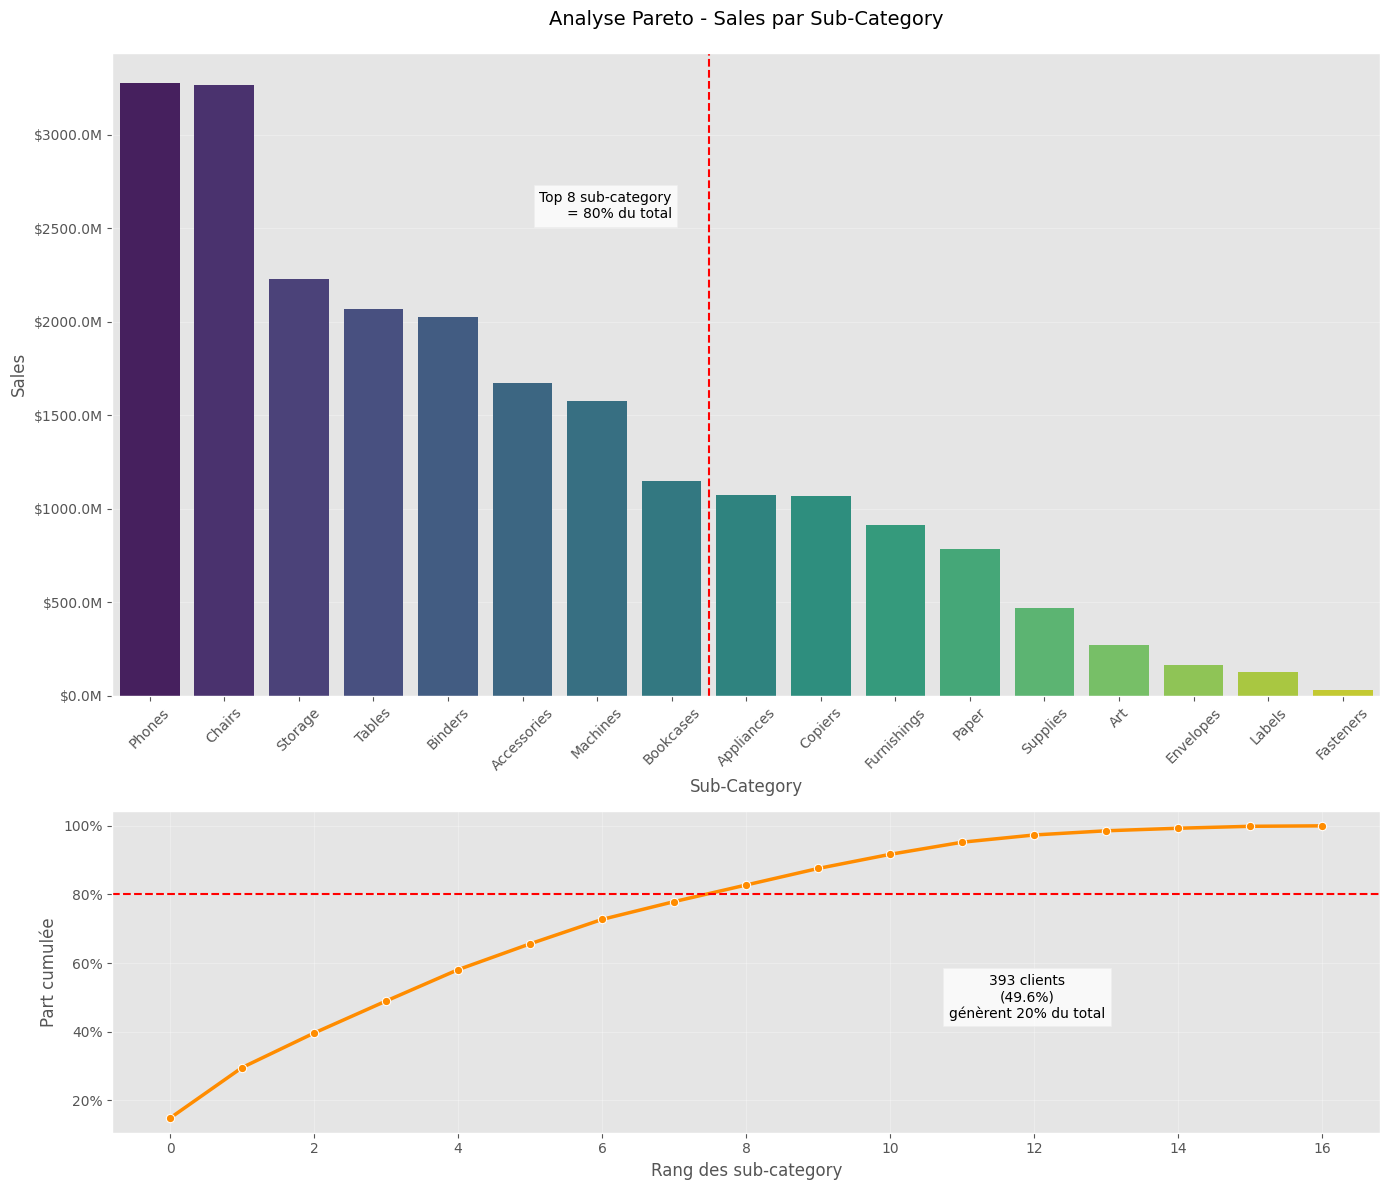


    
ANALYSE STATISTIQUE PARETO:
    [Par Catégories]
    • Nombre total: 17
    • Top 8 éléments représentent: $17721.6M (80%)
    • Valeur moyenne top éléments: $2157249.1K
    • Valeur moyenne autres éléments: $543781.7K

    [Par Clients]
    • Nombre total de clients: 793
    • Top 158 clients représentent: $10363.8M (80%)
    • Valeur moyenne top clients: $65593.8K
    • Valeur moyenne autres clients: $18564.1K

    [Global]
    • Valeur totale analysée: $22152.03M
    

Analyse Pareto générée avec succès! Colonne analysée: Sales


In [ ]:
## Pour analyser les sous-catégories :

# plot_interactive_pareto(
#     df_clean,
#     category_col='Sub-Category',  # Analyse par sous-catégorie
#     value_col='Sales',
#     customer_col='Customer Name'   # Colonne client séparée
# )

C:\Users\Zbook\AppData\Local\Temp\ipykernel_19816\1846819550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette='rocket')


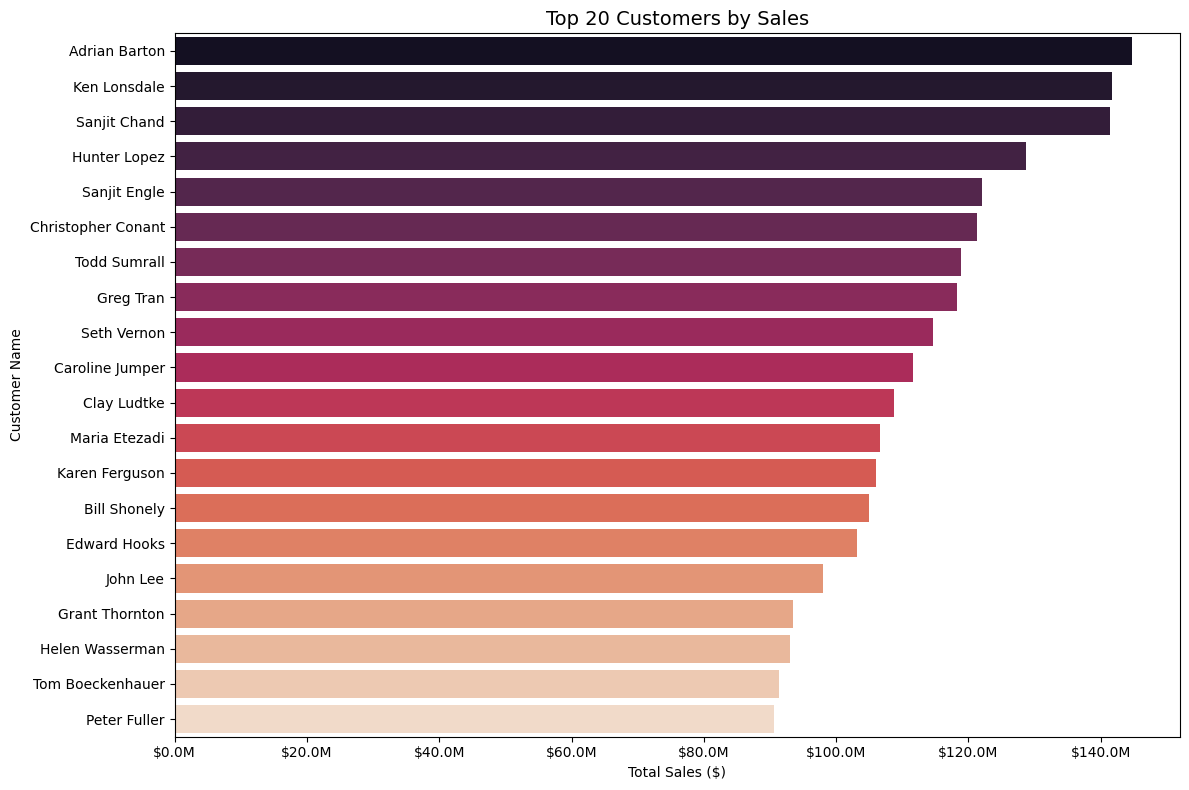

In [ ]:
# Q7: Top customers
plt.figure(figsize=(12,8))
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(20).reset_index()
sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette='rocket')
plt.title('Top 20 Customers by Sales', fontsize=14)
plt.xlabel('Total Sales ($)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
plt.tight_layout()
plt.show()


    What are the Top 20 customers by Sales?
    Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?


In [ ]:
priority_states = df.groupby('State')['Profit'].sum().nlargest(5).index.tolist()
priority_cities = df.groupby('City')['Profit'].sum().nlargest(5).index.tolist()
top_customers = df.groupby('Customer Name')['Profit'].sum().nlargest(5).index.tolist()

print("\nMARKETING RECOMMENDATIONS:")
print(f"1. Focus States: {', '.join(priority_states)}")
print(f"2. Target Cities: {', '.join(priority_cities)}")
print(f"3. Key Accounts: {', '.join(top_customers)}")
print("\nSuggested Actions:")
print("- Increase marketing budget in priority states/cities")
print("- Develop loyalty programs for top customers")
print("- Analyze product mix in high-profit regions")


MARKETING RECOMMENDATIONS:
1. Focus States: California, New York, Washington, Michigan, Virginia
2. Target Cities: New York City, Los Angeles, Seattle, San Francisco, Detroit
3. Key Accounts: Tamara Chand, Raymond Buch, Sanjit Chand, Hunter Lopez, Adrian Barton

Suggested Actions:
- Increase marketing budget in priority states/cities
- Develop loyalty programs for top customers
- Analyze product mix in high-profit regions
